In [1]:
###--------------------------------------------LOAD LIBRARIES
import scanpy as sc
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy

In [3]:
###--------------------------------------------LOAD DATA

#--Load tangram deconvoluted data and combine IF and nonIF data
adata = sc.read("../LIBD_LR/grantpm/DLPFC_Visium_LIBD/processed-data/MGP_analysis/nonIF_c2l_anndata_combined.h5ad")
adata.obs['key'] = adata.obs.index+'_'+adata.obs['sample_id'].astype(str)
adata.obs['bayesSpace_harmony_16'] = adata.obs['bayesSpace_harmony_16'].astype('category')


In [35]:
reslist = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7']

for res in range(0,len(reslist)):
    print(reslist[res])
    top = pd.read_csv('processed_data/03-LR_network_visualisation/louvain_largest_cluster_%s.csv' % reslist[res], sep = ',', index_col = 0)
    for n in range(0,10000):
        sc.tl.score_genes(adata, list(adata.var[adata.var['gene_name'].isin(list(top['0']))].index), ctrl_size = len(list(top['0'])))
        df = adata.obs['score']
        if (n == 0):
            all_scores = df
        else: 
            all_scores = pd.concat([all_scores, df], axis = 1)
    adata.obs['score'] = all_scores.mean(axis = 1)
    if (res==0):
        temp = adata.obs[['bayesSpace_harmony_9', 'bayesSpace_harmony_16', 'score']]
        temp['resolution'] = reslist[res]
        sd = temp
    else:
        temp = adata.obs[['bayesSpace_harmony_9', 'bayesSpace_harmony_16', 'score']]
        temp['resolution'] = reslist[res]
        sd = pd.concat([sd,temp], axis = 0)

0.1


/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/tmp/slurm_50383956/ipykernel_10327/3140928713.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['resolution'] = reslist[res]


0.2


/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/tmp/slurm_50383956/ipykernel_10327/3140928713.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['resolution'] = reslist[res]


0.3


/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/tmp/slurm_50383956/ipykernel_10327/3140928713.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['resolution'] = reslist[res]


0.4


/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/tmp/slurm_50383956/ipykernel_10327/3140928713.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['resolution'] = reslist[res]


0.5


/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/tmp/slurm_50383956/ipykernel_10327/3140928713.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['resolution'] = reslist[res]


0.6


/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/tmp/slurm_50383956/ipykernel_10327/3140928713.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['resolution'] = reslist[res]


0.7


/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/camp/lab/gandhis/home/users/grantpm/.conda/envs/panpipes/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/tmp/slurm_50383956/ipykernel_10327/3140928713.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['resolution'] = reslist[res]


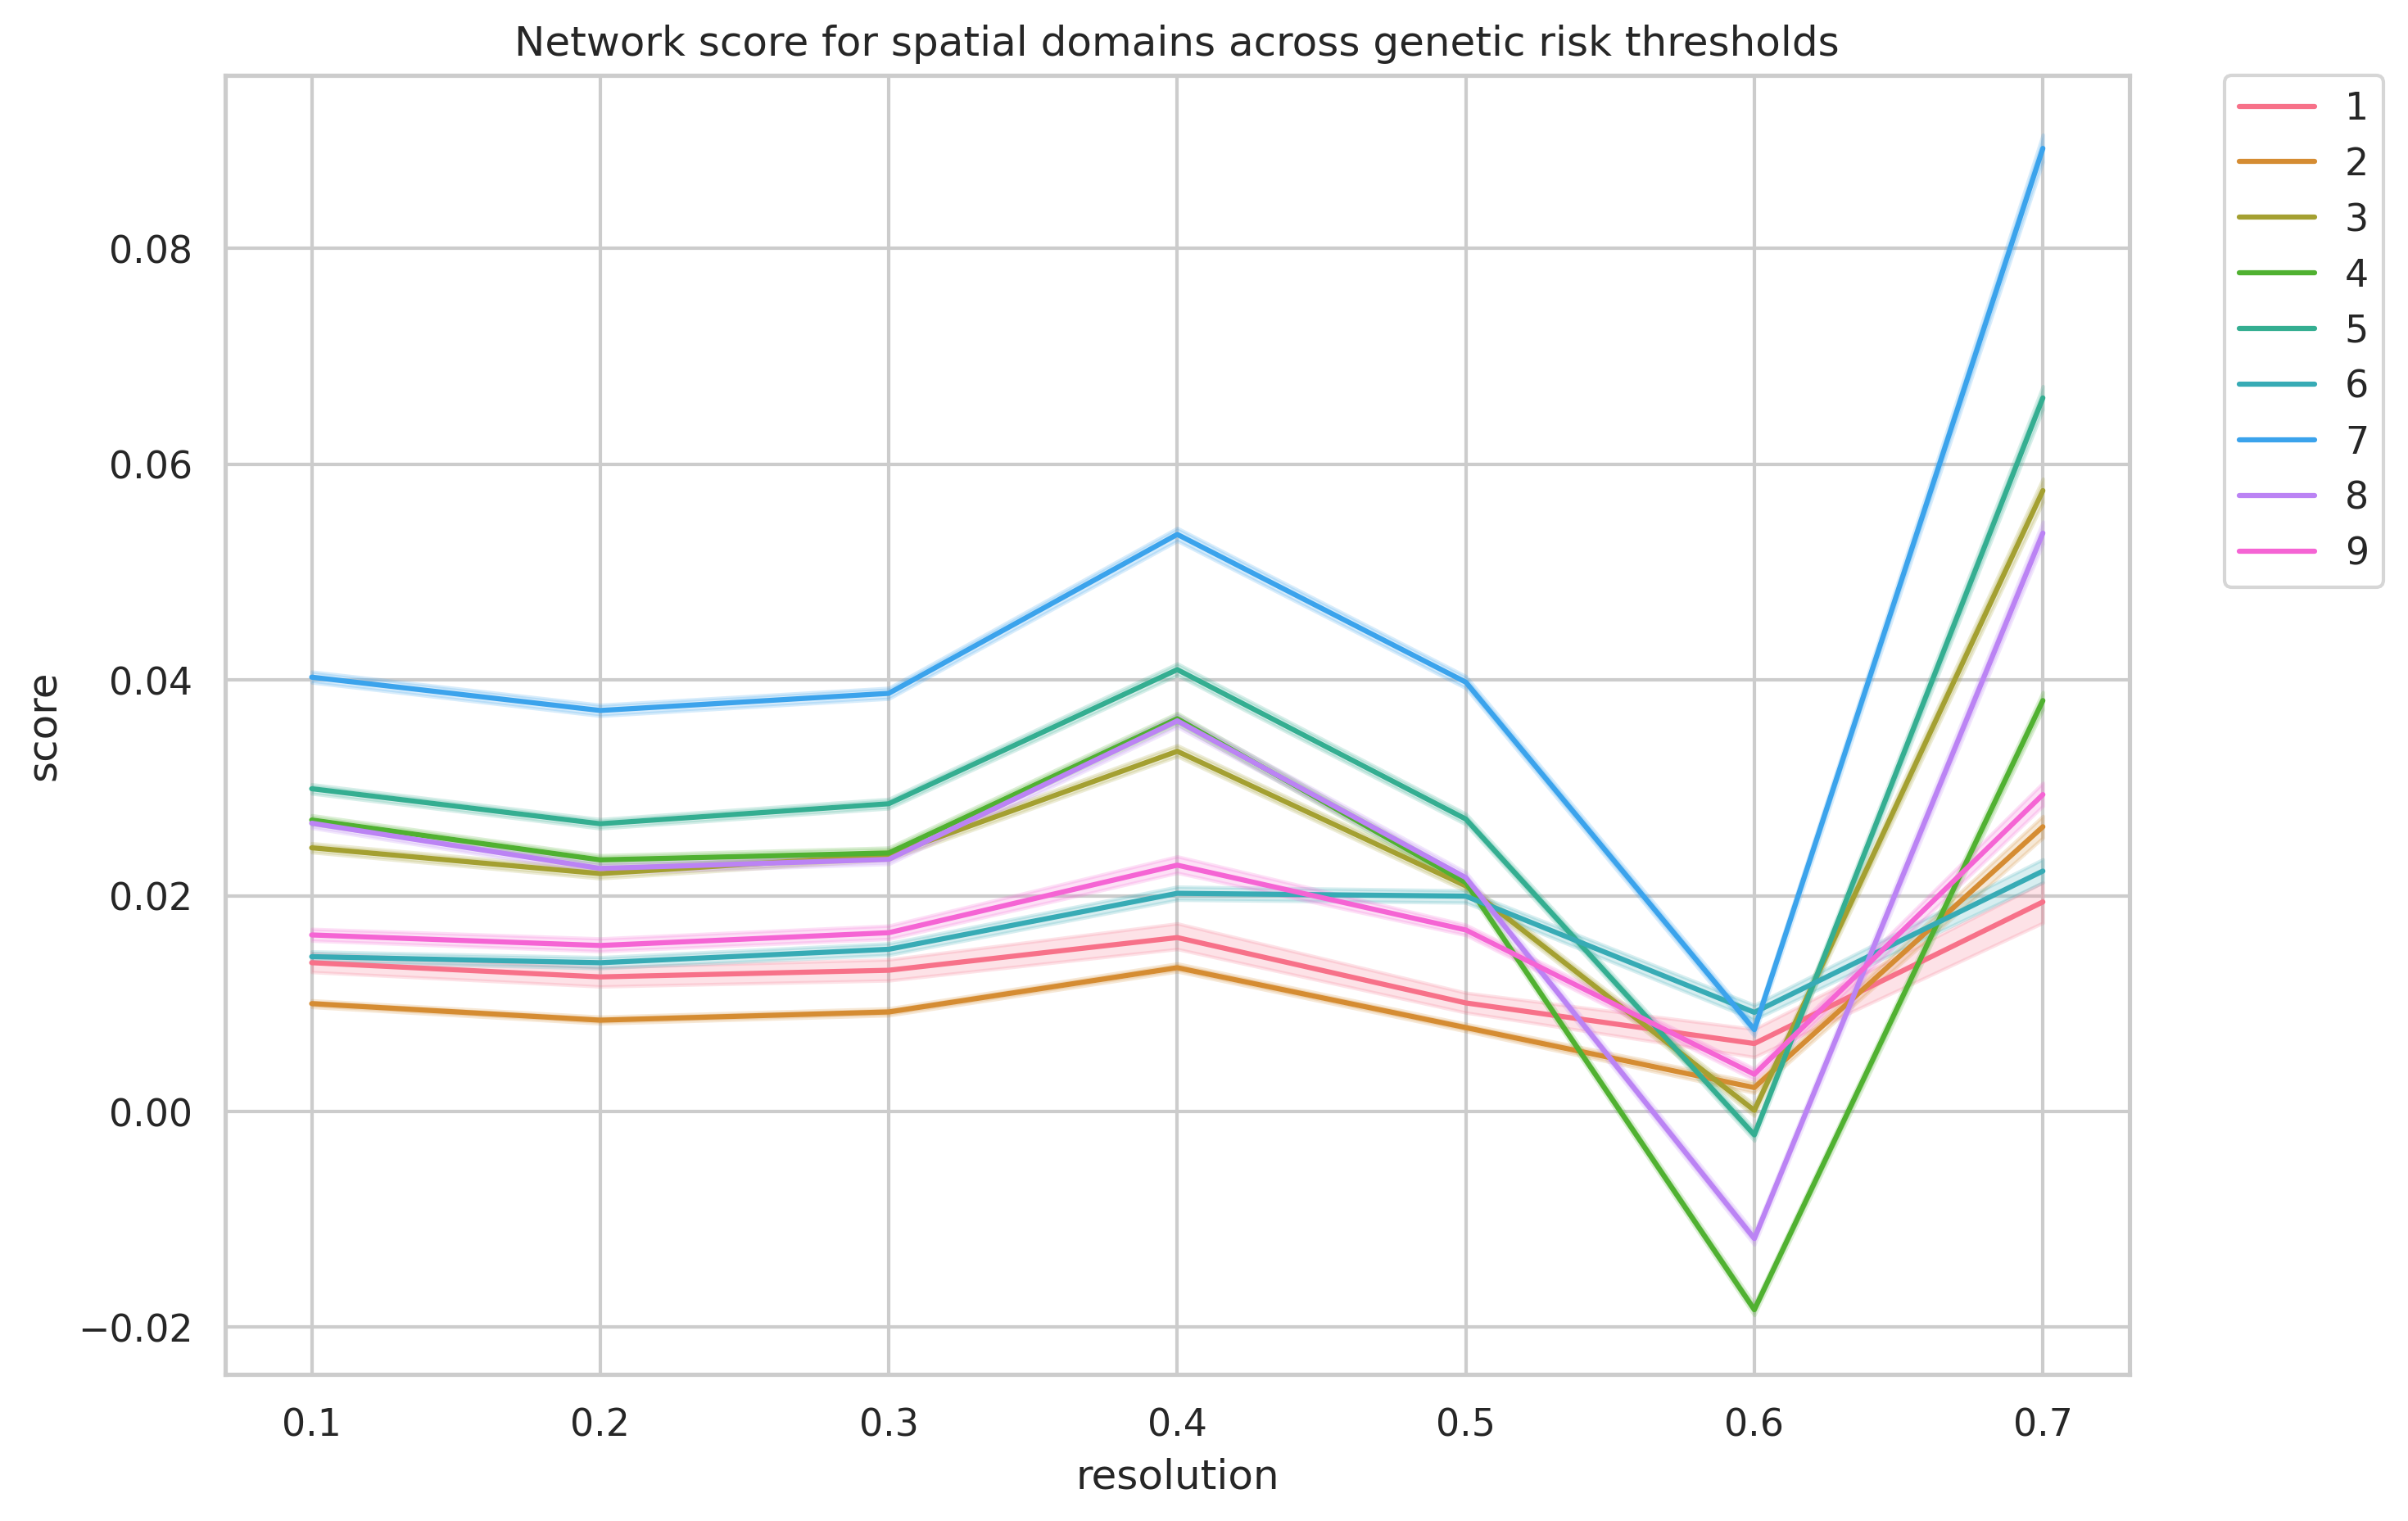

In [36]:
sns.set_theme(style="whitegrid", palette= sns.color_palette("husl", 9))
plt.figure(figsize=(10,7), dpi = 300)
sns.lineplot(data=sd.reset_index(), x="resolution", y="score", hue = "bayesSpace_harmony_9")
plt.title('Network score for spatial domains across genetic risk thresholds')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('plots/03-LR_network_visualisation/03e_network_spatial_analysis/bayespace_harmony_9_across_resolutions.pdf', bbox_inches = 'tight')
plt.show()

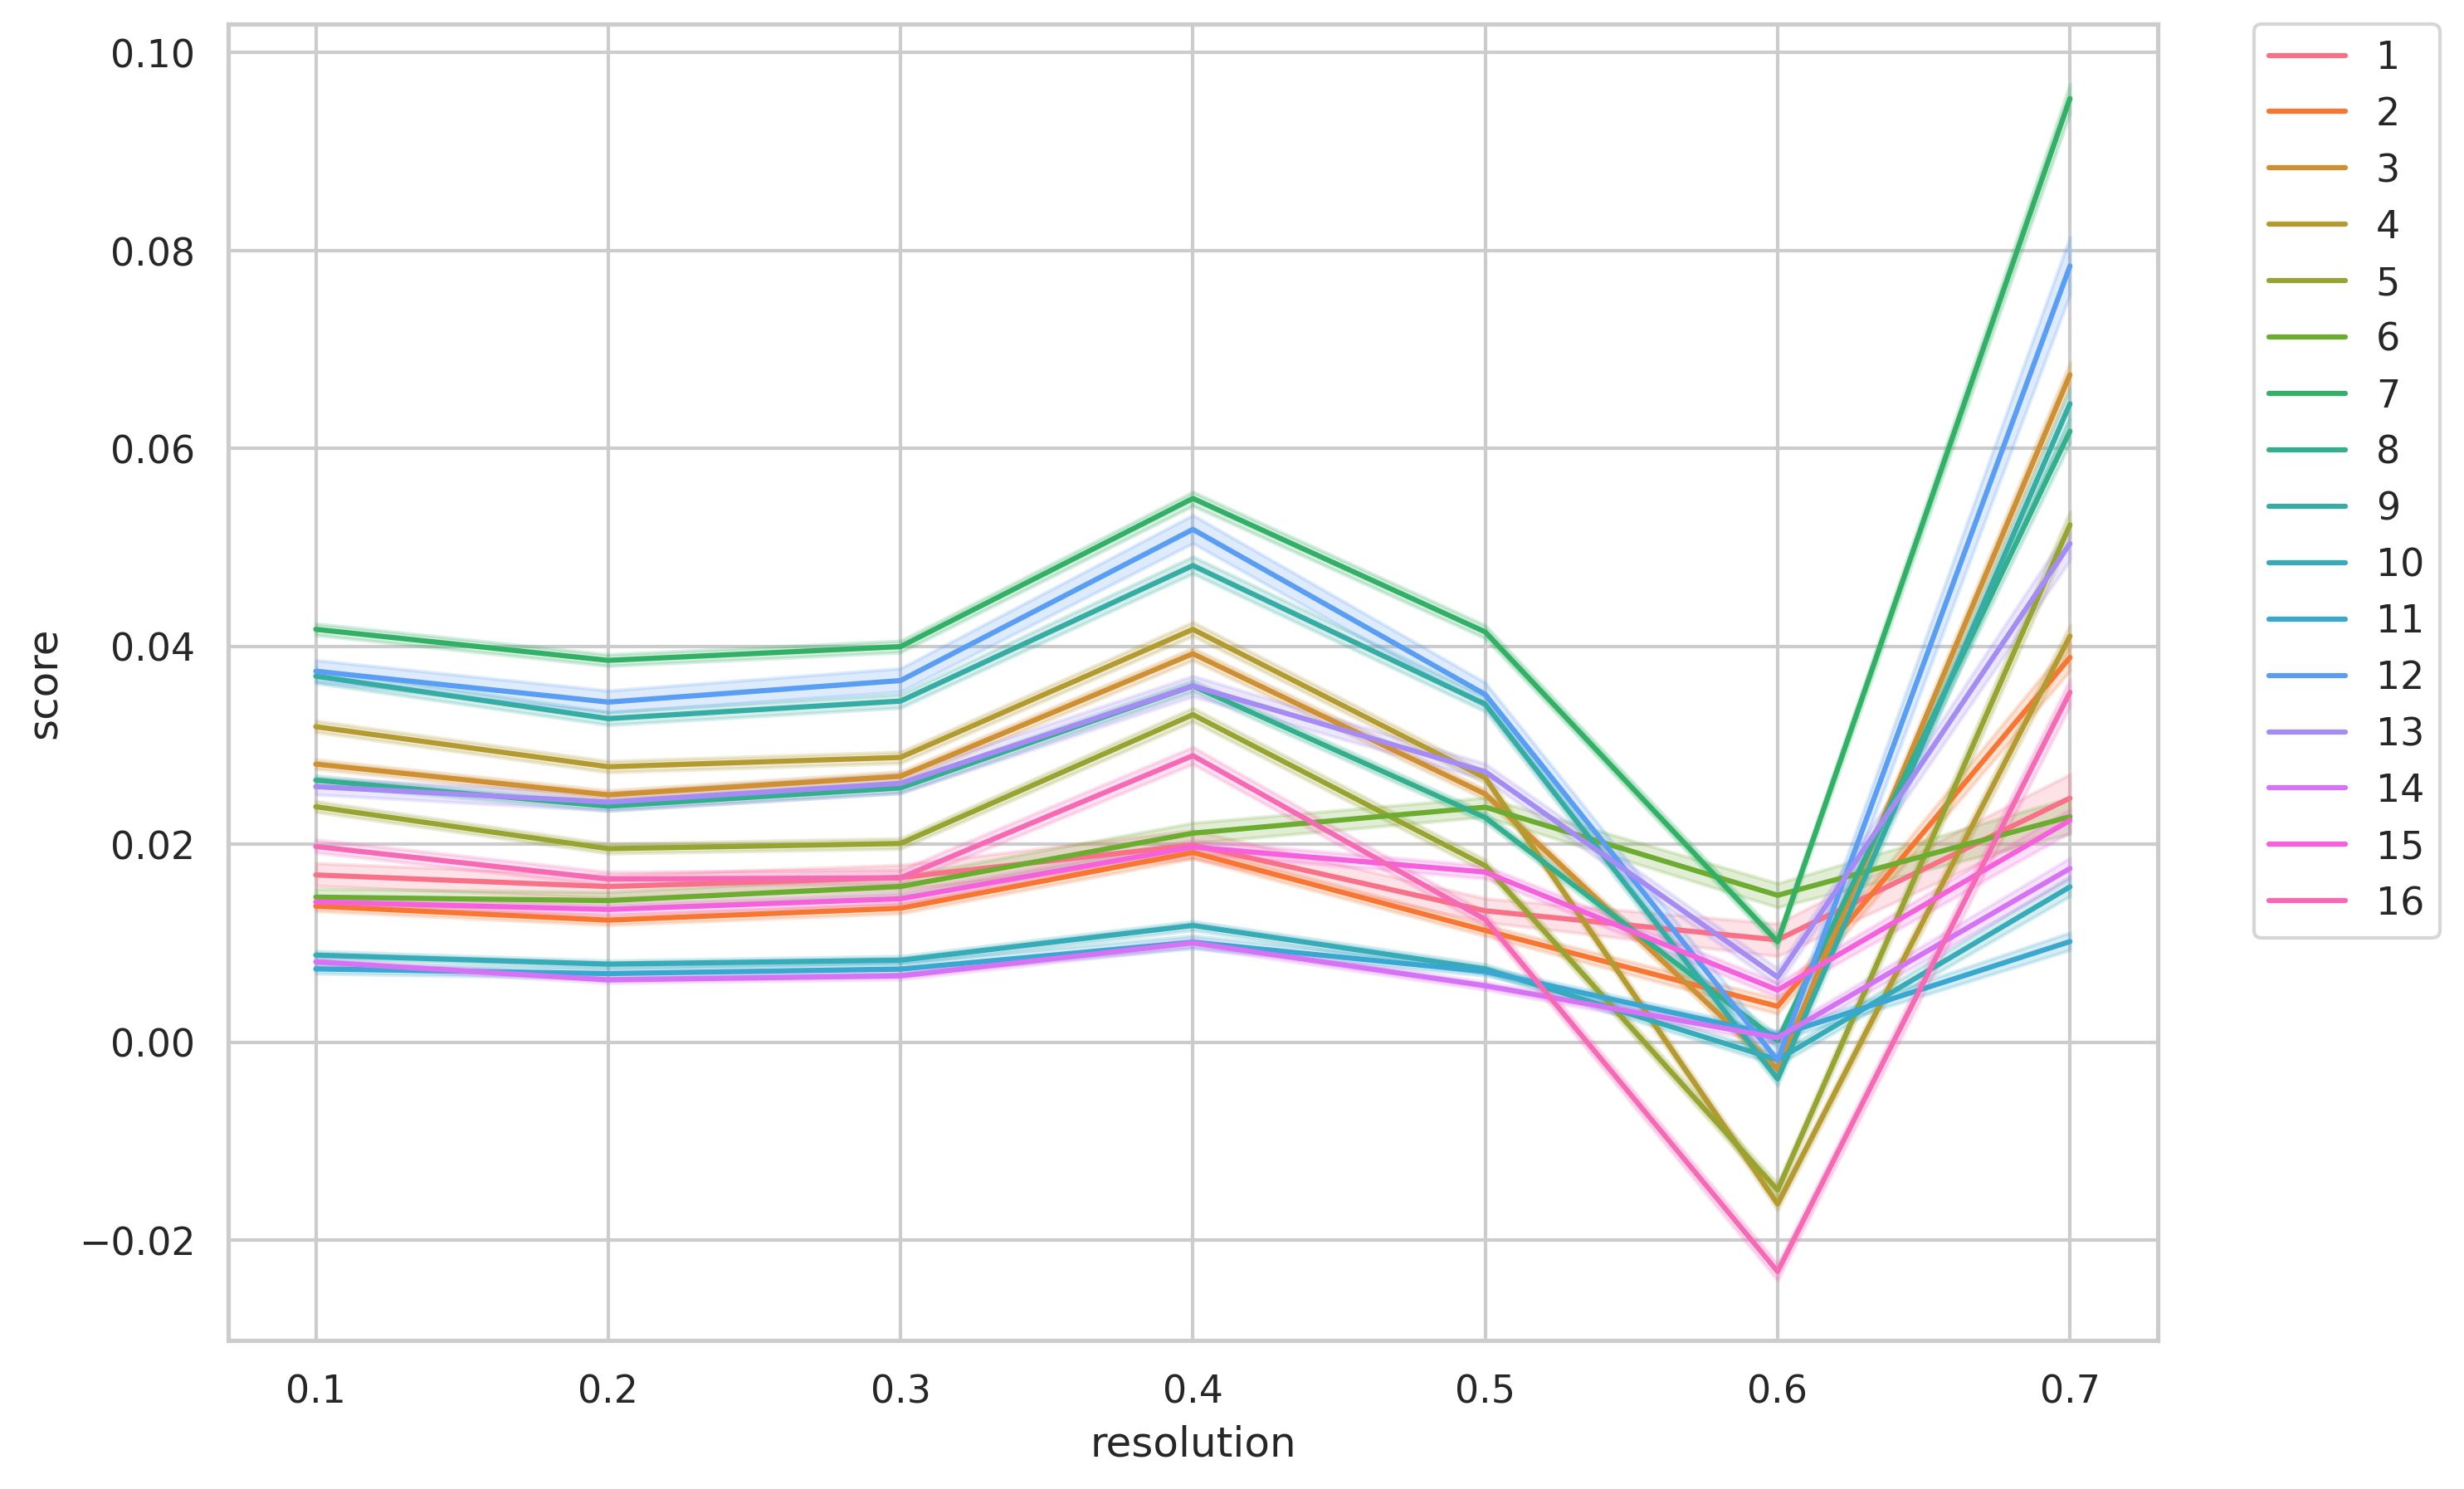

In [6]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(10,7), dpi = 300)
sns.lineplot(data=sd.reset_index(), x="resolution", y="score", hue = "bayesSpace_harmony_16")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('plots/03-LR_network_visualisation/03e_network_spatial_analysis/bayespace_harmony_16_across_resolutions.pdf', bbox_inches = 'tight')
plt.show()

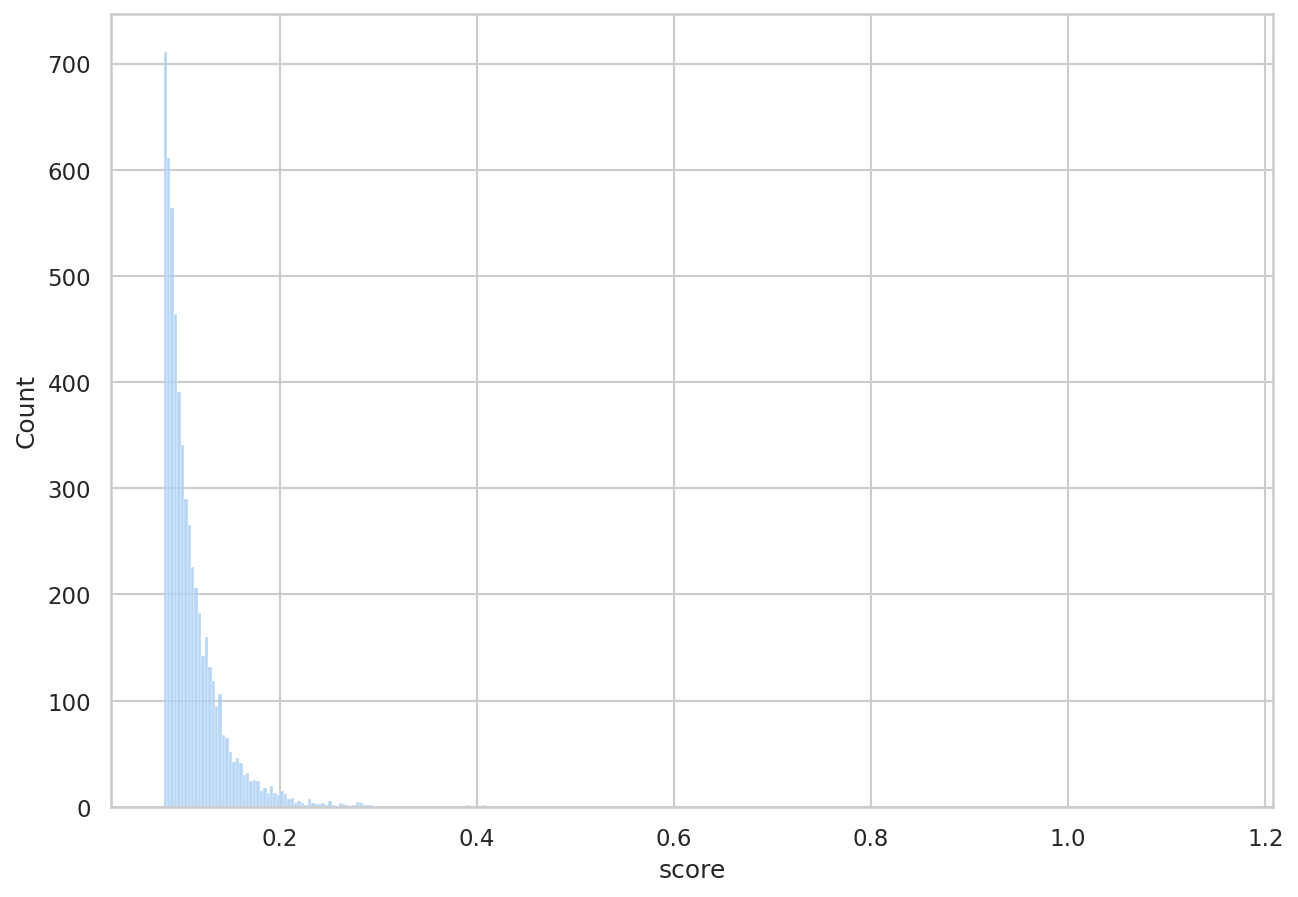

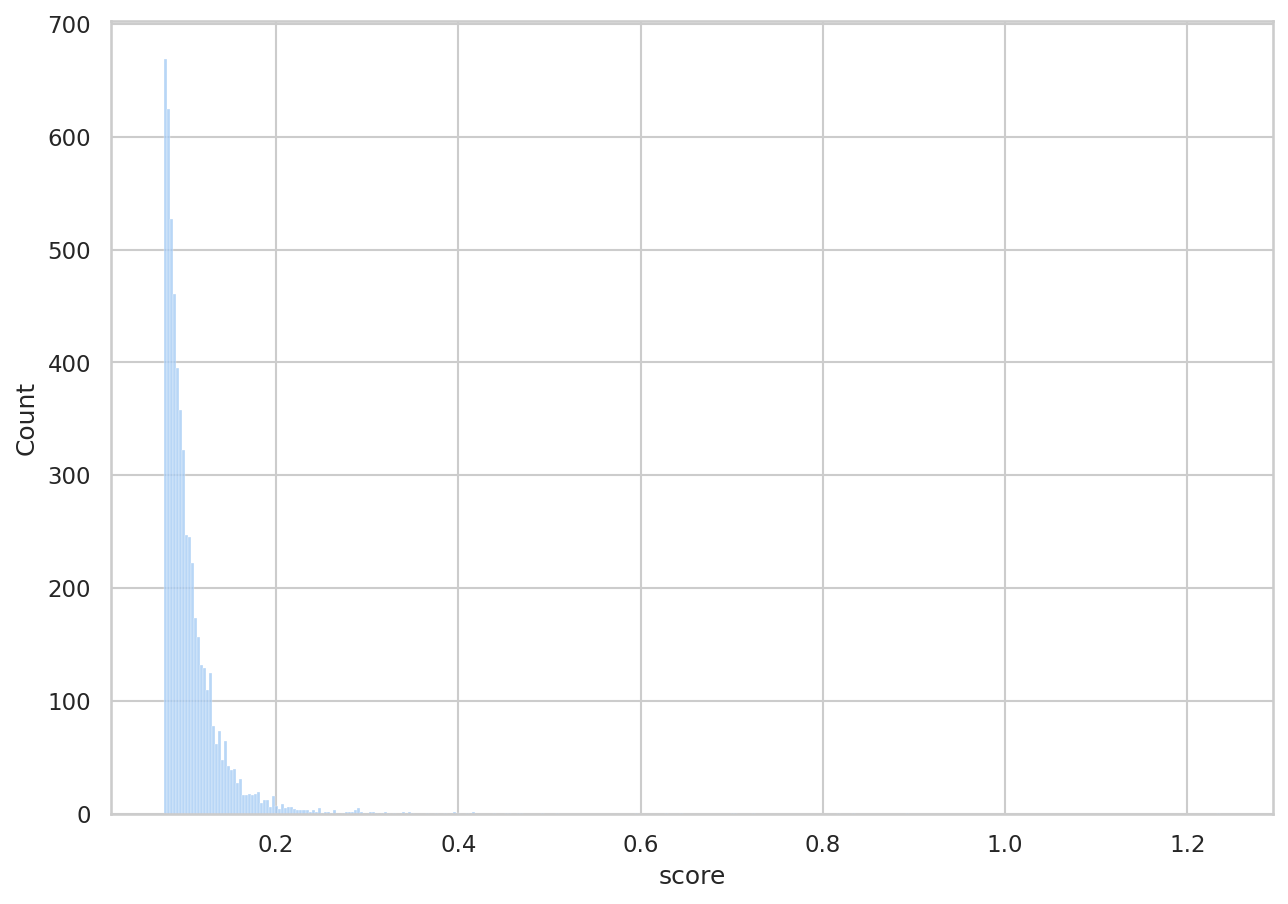

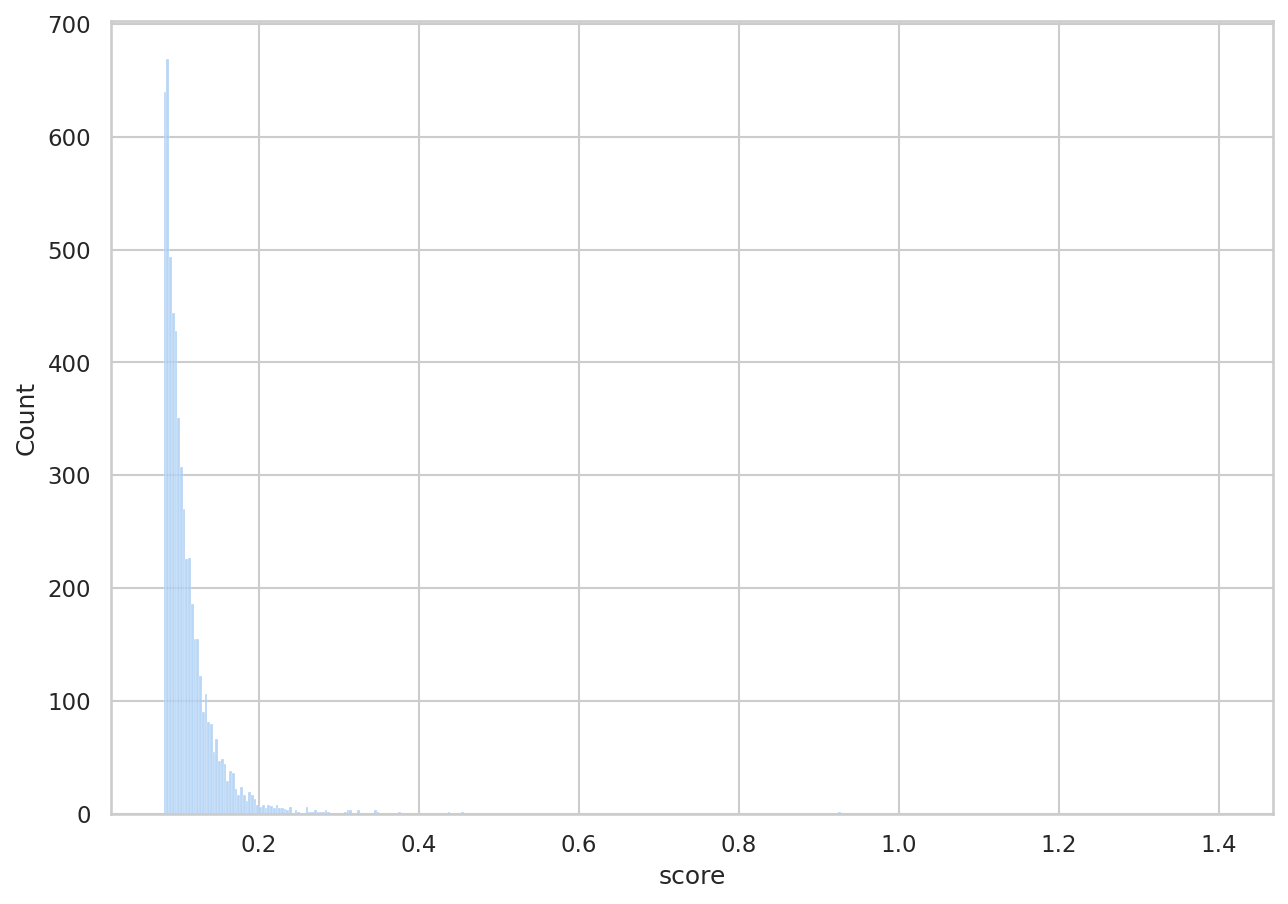

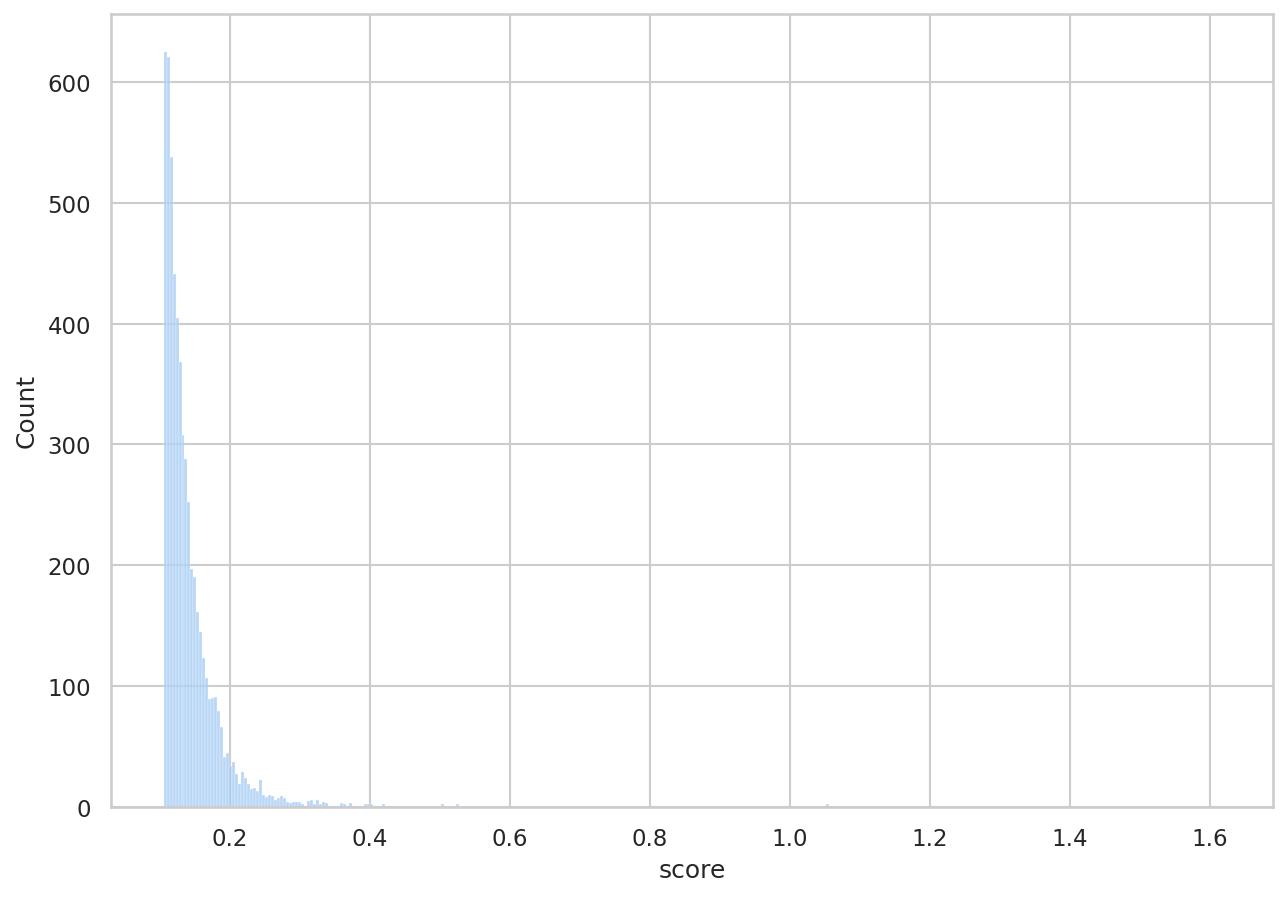

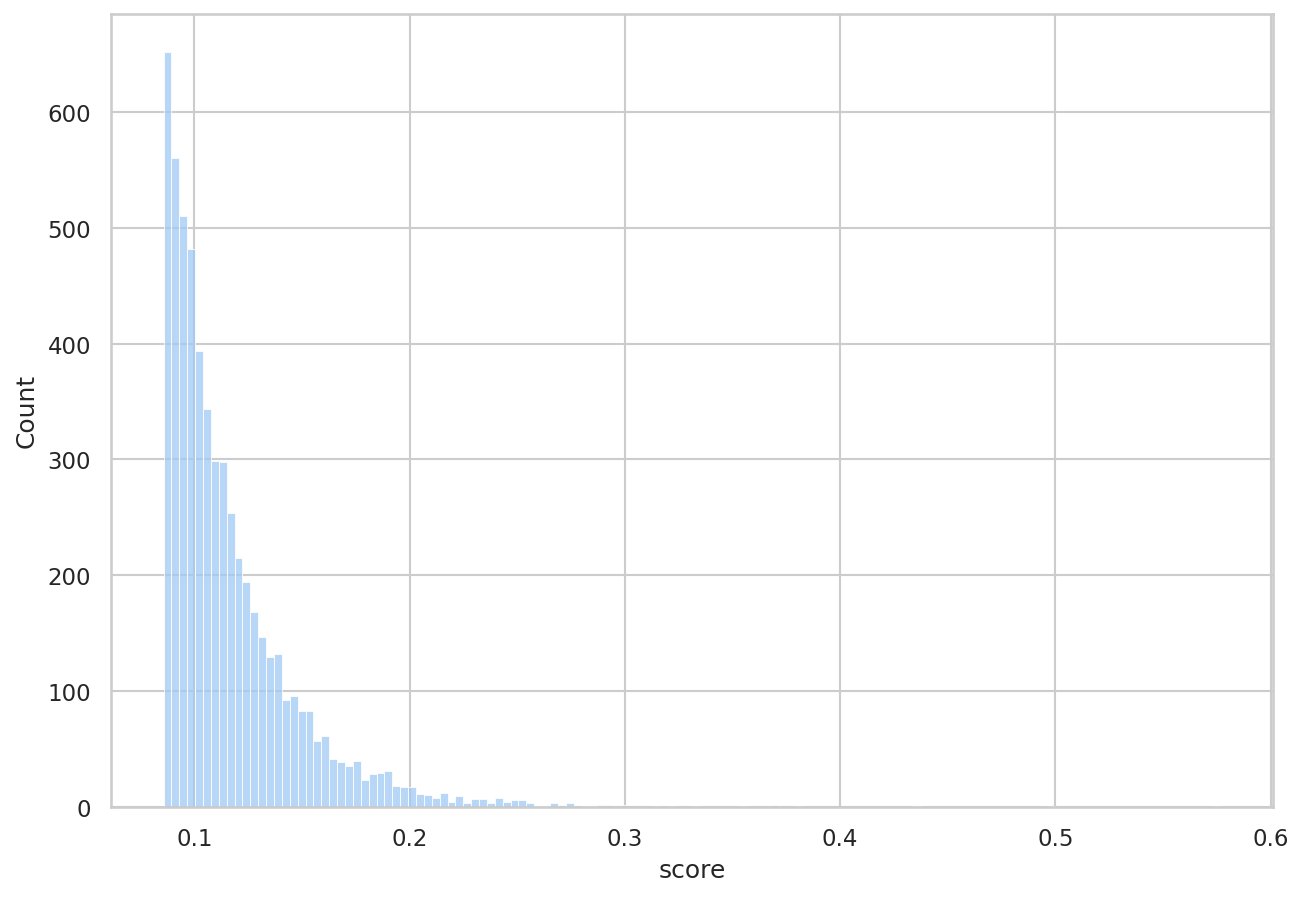

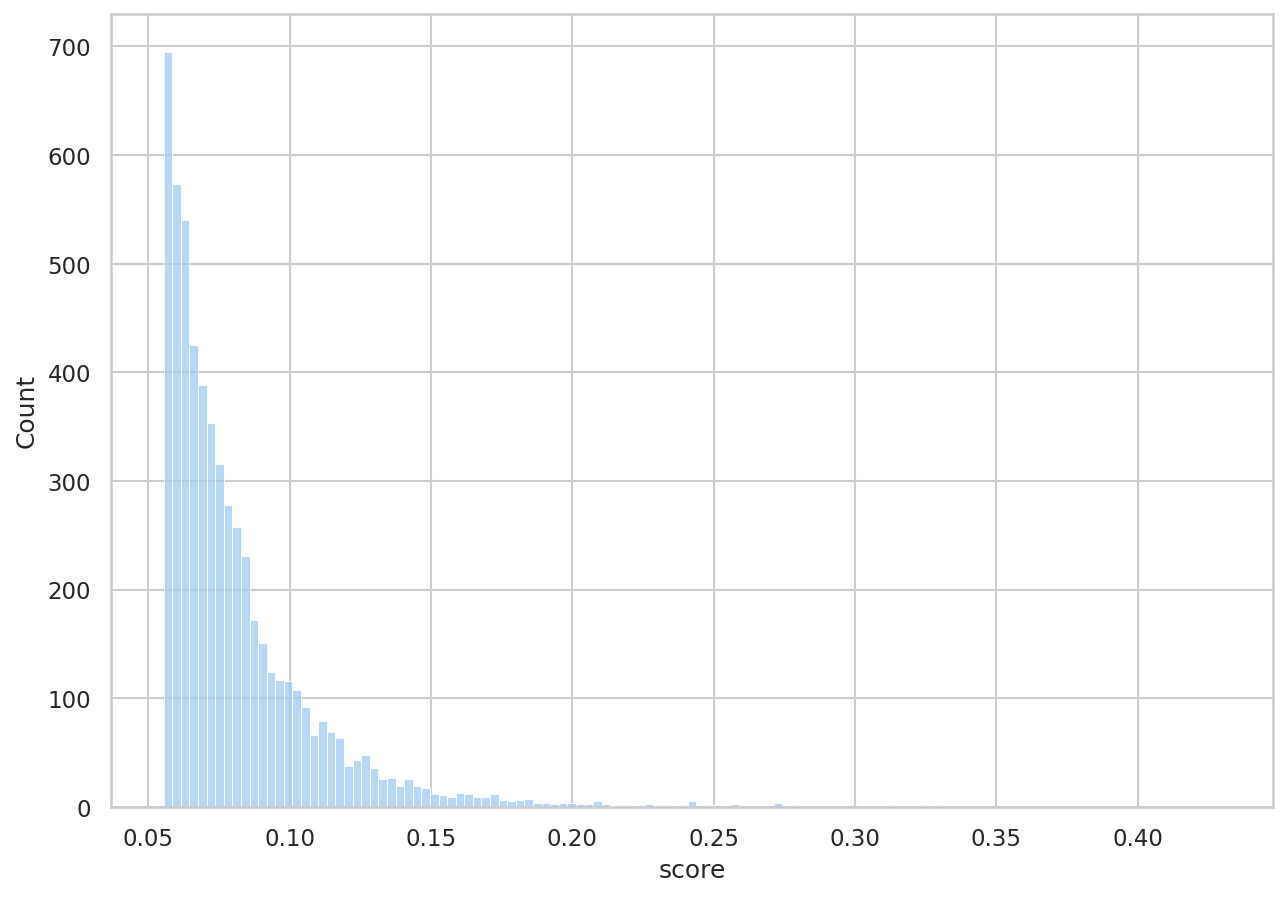

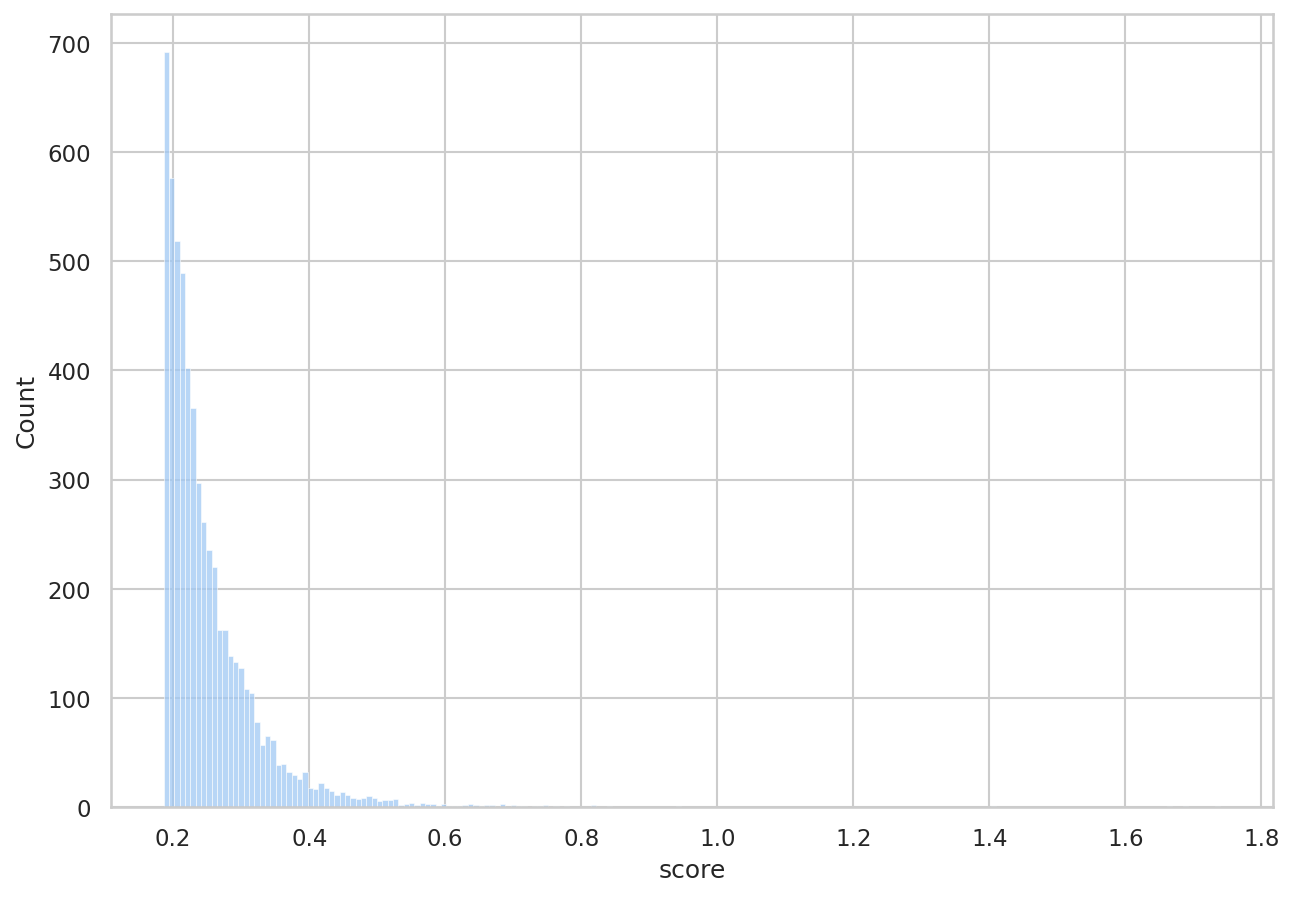

In [27]:
def network_top3(adata):
    probs = adata.obs[['Astro', 'EndoMural', 'Micro', 'Oligo', 'OPC', 'Excit_L2_3', 'Excit_L3',
       'Excit_L3_4_5', 'Excit_L4', 'Excit_L5', 'Excit_L5_6', 'Excit_L6',
       'Inhib']]

    print("Building adjacency matrix for top 3 cells per spot...")
    hot1 = copy.copy(probs)
    hot1.iloc[:,:] = 0
    for m in range (0,np.shape(probs)[0]):
        hot1.iloc[m,:][probs.T[probs.index[m]].nlargest(6).index]=1

    adj = hot1.T.dot(hot1)
    np.fill_diagonal(adj.values, 0)
    adj = adj = pd.DataFrame(np.tril(adj), index = adj.index, columns = adj.columns)
    adjmat_notnorm = adj
    adjmat = (adj/adj.sum().sum())
    print("Done.")
    print(adjmat.sum().sum())
    
    sns.heatmap(pd.DataFrame(adjmat), cmap = 'inferno_r')
    #plt.savefig("../../../plots/gene-risk-LR-analysis/03-colocalisation_analysis/%s_c2l_3cells_heatmap.pdf" % (tgt), dpi = 150, bbox_inches = 'tight')
    plt.show()
    plt.clf()
    #adjmat_notnorm.to_csv("../../../processed-data/gene-risk-LR-analysis/03-colocalisation_analysis/%s_c2l_3cells_adjacencymatrix_notnormalised.csv" % (tgt))
    #adjmat.to_csv("../../../processed-data/gene-risk-LR-analysis/03-colocalisation_analysis/%s_c2l_3cells_adjacencymatrix.csv" % (tgt))
    return adjmat


reslist = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7']

for res in range(0,len(reslist)):
    qt = sd[sd['resolution']==reslist[res]]['score'].quantile(0.95)
    sub = sd[sd['resolution']==reslist[res]]

    plt.figure(figsize=(10,7), dpi = 150)
    sns.histplot(sub[sub['score']>qt]['score'])
    plt.savefig('plots/03-LR_network_visualisation/03e_network_spatial_analysis/histogram_score_distribution_per_resolution_%s.pdf' % reslist[res], bbox_inches = 'tight')
    plt.show()
    
    plt.figure(figsize=(10,10), dpi = 150)
    sns.heatmap(pd.DataFrame(network_top3(adata[sub[sub['score']>sd[sd['resolution']==reslist[res]]['score'].quantile(0.95)]['score'].index])/network_top3(adata[sub[sub['score']<sd[sd['resolution']==reslist[res]]['score'].quantile(0.95)]['score'].index])))
    plt.savefig('plots/03-LR_network_visualisation/03e_network_spatial_analysis/neighborhood_c2l_top95pct_per_resolution_%s.pdf' % reslist[res], bbox_inches = 'tight')
    plt.show()